In [2]:
import os
import torch
import numpy as np
import cv2
import torch
from torch import nn
from torchvision.ops.boxes import _box_inter_union
from torchvision.ops import generalized_box_iou_loss
import typing

In [2]:
!git clone https://github.com/tcotte/CircleDetection.git

Cloning into 'CircleDetection'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 187 (delta 74), reused 165 (delta 56), pack-reused 0
Receiving objects: 100% (187/187), 364.35 KiB | 1.66 MiB/s, done.
Resolving deltas: 100% (74/74), done.


### Dataset generation

In [24]:
!rm -rf /content/dataset

In [3]:
os.makedirs(os.path.join('/content', 'dataset'))
os.makedirs(os.path.join('/content', 'dataset', 'train'))
os.makedirs(os.path.join('/content', 'dataset', 'val'))

In [25]:
!python /content/CircleDetection/dataset_creation/easy_circle.py --path /content/dataset/train --nb_samples 5000 --empty-pix-percentage 0.3
!python /content/CircleDetection/dataset_creation/easy_circle.py --path /content/dataset/val --nb_samples 500 --empty-pix-percentage 0.1

[INFO] Directories creation
[INFO] Dataset creation
100% 4999/4999 [00:03<00:00, 1382.69it/s]
[INFO] Directories creation
[INFO] Dataset creation
100% 499/499 [00:00<00:00, 1347.79it/s]


### Existing daatset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_X = '/content/drive/MyDrive/Evry/Legionelles/img'
path_y = '/content/drive/MyDrive/Evry/Legionelles/labels'

X = [os.path.join(path_X, x) for x in os.listdir(path_X)]
y = [os.path.join(path_y, x) for x in os.listdir(path_y)]
y.sort()
X.sort()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
os.makedirs(os.path.join('/content', 'dataset'))
os.makedirs(os.path.join('/content', 'dataset', 'train'))
os.makedirs(os.path.join('/content', 'dataset', 'train', 'img'))
os.makedirs(os.path.join('/content', 'dataset', 'train', 'labels'))
os.makedirs(os.path.join('/content', 'dataset', 'val'))
os.makedirs(os.path.join('/content', 'dataset', 'val', 'img'))
os.makedirs(os.path.join('/content', 'dataset', 'val', 'labels'))

In [ ]:
import shutil

for dataset, path in zip([X_train, X_test, y_train, y_test], ["/content/dataset/train/img", "/content/dataset/val/img", "/content/dataset/train/labels", "/content/dataset/val/labels"]):
  for i in dataset:
    shutil.copyfile(i, os.path.join(path, i.split('/')[-1]))

### Training

In [27]:
%cd /content/CircleDetection

/content/CircleDetection


In [ ]:
def giou_loss(input_boxes, target_boxes, eps=1e-7):
    """
    Args:
        input_boxes: Tensor of shape (N, 4) or (4,).
        target_boxes: Tensor of shape (N, 4) or (4,).
        eps (float): small number to prevent division by zero
    """
    inter, union = _box_inter_union(input_boxes, target_boxes)
    iou = inter / union

    # area of the smallest enclosing box
    min_box = torch.min(input_boxes, target_boxes)
    max_box = torch.max(input_boxes, target_boxes)
    area_c = (max_box[:, 2] - min_box[:, 0]) * (max_box[:, 3] - min_box[:, 1])

    giou = iou - ((area_c - union) / (area_c + eps))

    loss = 1 - giou

    return loss.sum()


class GIoULoss(torch.nn.Module):
    def __init__(self):
        super(GIoULoss, self).__init__()

    def forward(self, predictions, target):
        return giou_loss(input_boxes=predictions, target_boxes=target, eps=1e-7)

from torchvision.ops import distance_box_iou_loss



class DIoULoss(torch.nn.Module):
    def __init__(self):
      super(DIoULoss, self).__init__()

    def forward(self, predictions, target):
      return distance_box_iou_loss(boxes1=target, boxes2=predictions, reduction="mean")

In [ ]:
def fix_bboxes(bboxes):
    for box in bboxes:
        if box[0] > box[2]:
            box[2] = box[0]
        if box[1] > box[3]:
            box[3] = box[1]
    return bboxes


In [ ]:
params= resnet.state_dict()
list_layers = list(params.keys())

In [ ]:
def print_net_parameters(net):
    for name, para in net.named_parameters():
        print("-"*20)
        print(f"name: {name}")
        print("values: ")
        print(param.requires_grad)

In [ ]:
for name, param in resnet.named_parameters():
  if name in list_layers[-5:]:
    print("yes")
    param.requires_grad = True
  else:
    param.requires_grad = False

print_net_parameters(resnet)

In [10]:
%%capture
!pip install wandb --upgrade

In [ ]:
bs = 64
name = "test_colored_img_prob"
src = "/content/dataset"

!python train.py --batch-size {bs} --name {name} --bbox-ratio 0.7 --prob-ratio 0.3 --pretrained --wb --imgsz 128 128 --lr 1e-5 --path {src} --unfreeze 0

There is 100.00 % chance that a circle lying in the picture with [[17 19 88 91]] coordinates


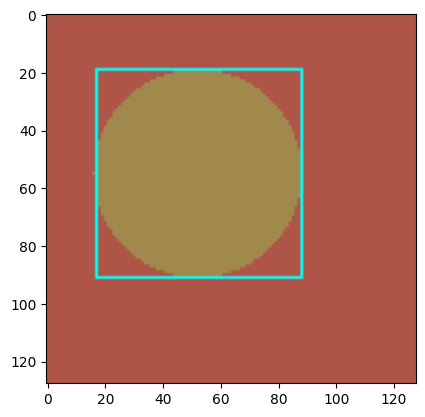

There is 100.00 % chance that a circle lying in the picture with [[45  2 82 40]] coordinates


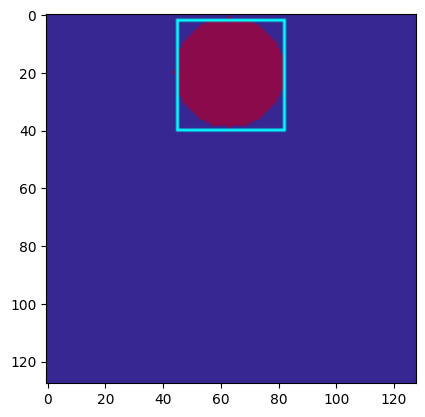

There is 100.00 % chance that a circle lying in the picture with [[ 2  2 83 85]] coordinates


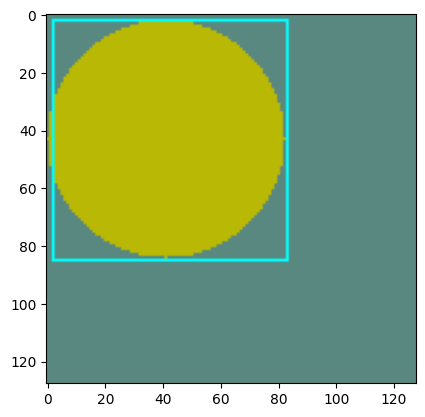

There is 100.00 % chance that a circle lying in the picture with [[34 60 56 82]] coordinates


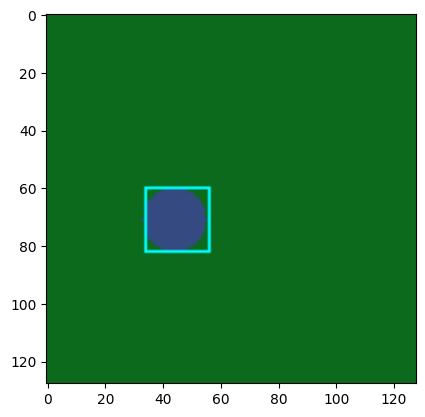

There is 100.00 % chance that a circle lying in the picture with [[ 2  4 68 72]] coordinates


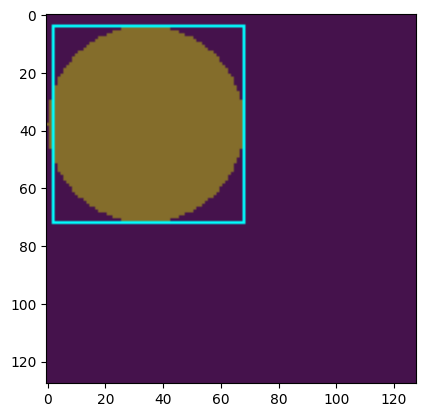

There is 100.00 % chance that a circle lying in the picture with [[ 8 26 72 89]] coordinates


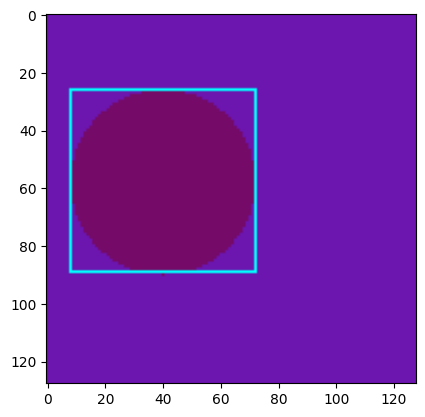

There is 0.00 % chance that a circle lying in the picture with [[0 0 0 0]] coordinates


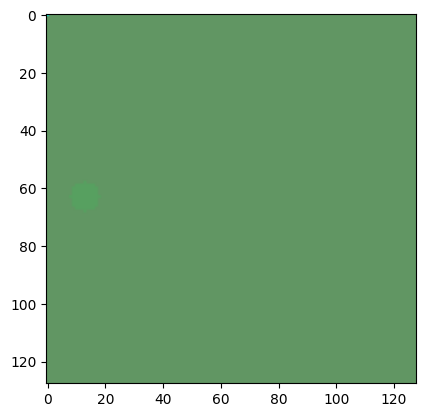

There is 100.00 % chance that a circle lying in the picture with [[37 10 96 68]] coordinates


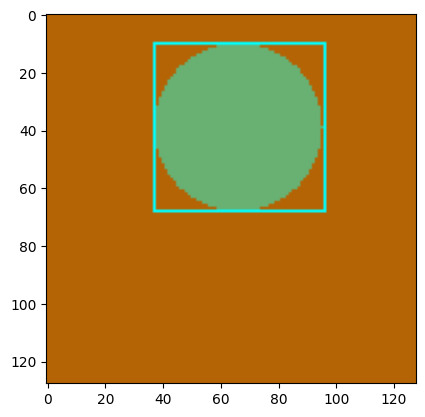

There is 100.00 % chance that a circle lying in the picture with [[ 9  9 87 87]] coordinates


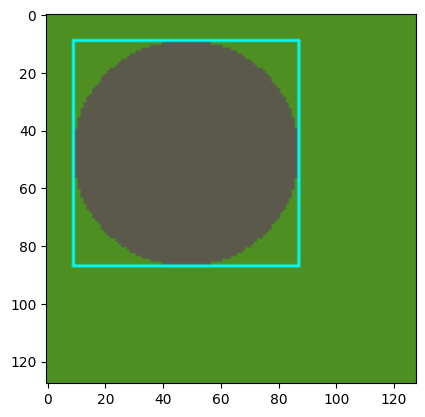

no ann
no ann
There is 0.00 % chance that a circle lying in the picture with [[0 0 0 0]] coordinates


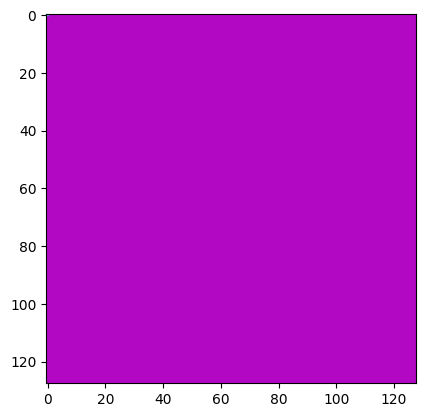

There is 100.00 % chance that a circle lying in the picture with [[ 5  5 73 73]] coordinates


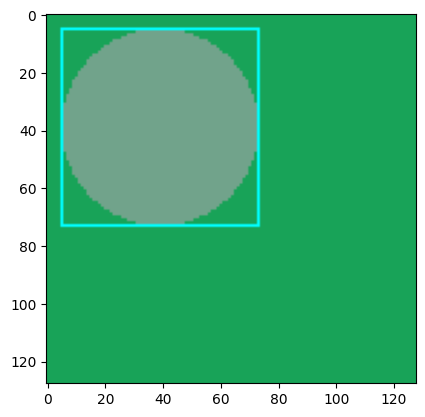

no ann
no ann
There is 0.00 % chance that a circle lying in the picture with [[0 0 0 0]] coordinates


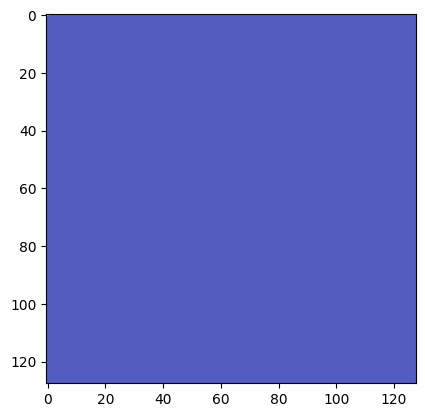

There is 99.99 % chance that a circle lying in the picture with [[62 62 79 80]] coordinates


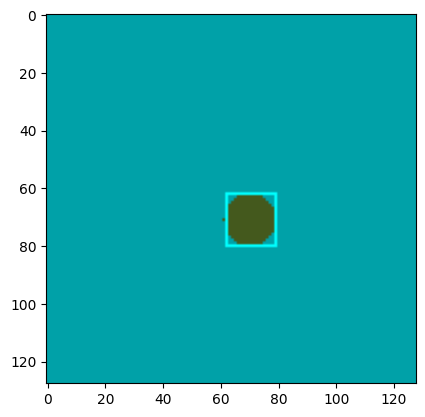

There is 100.00 % chance that a circle lying in the picture with [[18 52 38 72]] coordinates


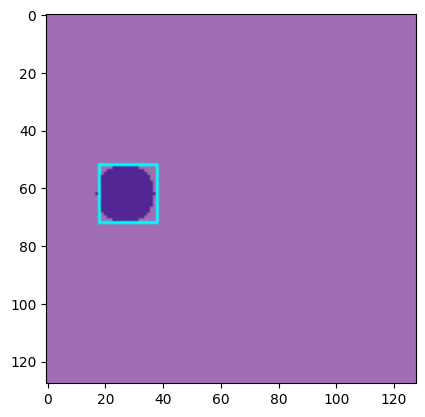

There is 100.00 % chance that a circle lying in the picture with [[ 3  3 83 83]] coordinates


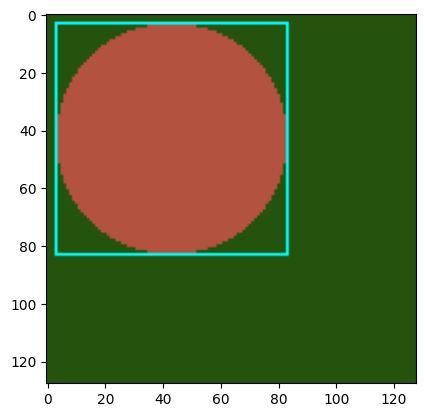

There is 100.00 % chance that a circle lying in the picture with [[25 35 63 73]] coordinates


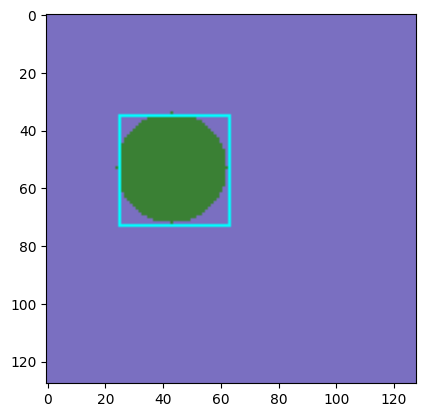

There is 100.00 % chance that a circle lying in the picture with [[25  5 81 61]] coordinates


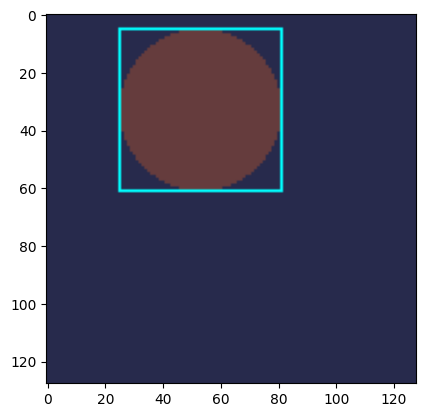

There is 100.00 % chance that a circle lying in the picture with [[ 41  53  90 102]] coordinates


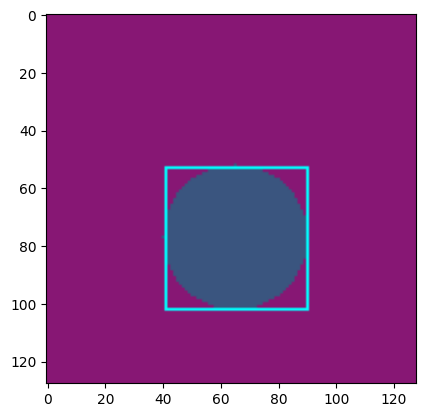

no ann
no ann
There is 0.00 % chance that a circle lying in the picture with [[0 0 0 0]] coordinates


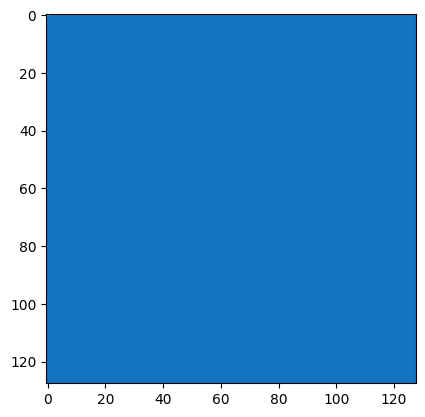

There is 100.00 % chance that a circle lying in the picture with [[71 30 81 40]] coordinates


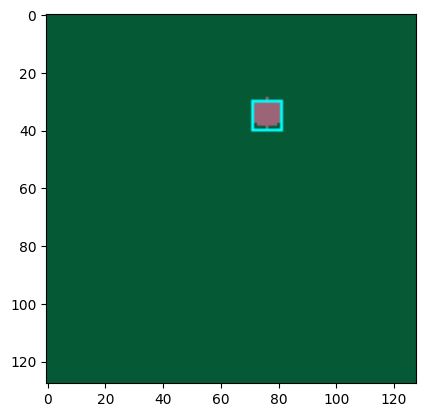

There is 100.00 % chance that a circle lying in the picture with [[16 19 76 79]] coordinates


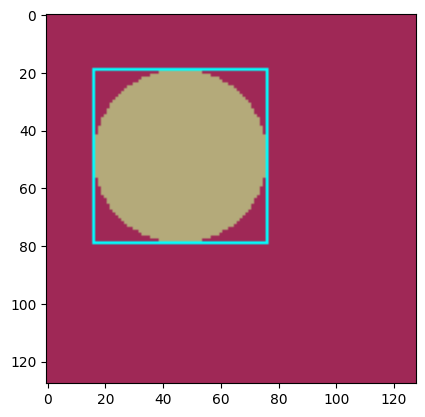

There is 100.00 % chance that a circle lying in the picture with [[ 63  82  84 103]] coordinates


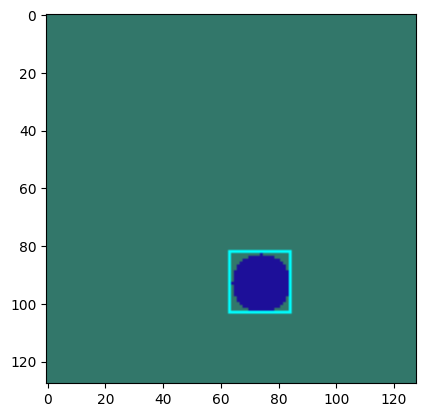

There is 100.00 % chance that a circle lying in the picture with [[ 3  2 71 69]] coordinates


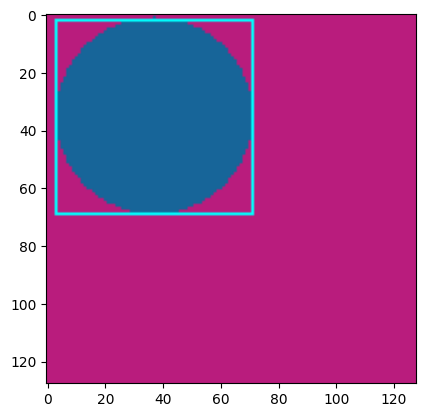

There is 100.00 % chance that a circle lying in the picture with [[ 7 28 65 85]] coordinates


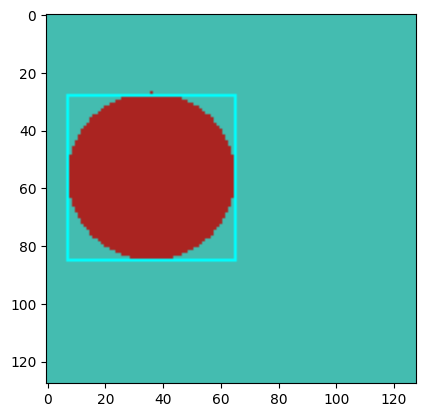

There is 100.00 % chance that a circle lying in the picture with [[34  3 82 52]] coordinates


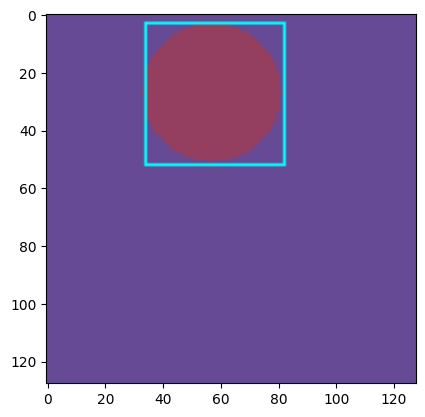

There is 100.00 % chance that a circle lying in the picture with [[14 17 82 85]] coordinates


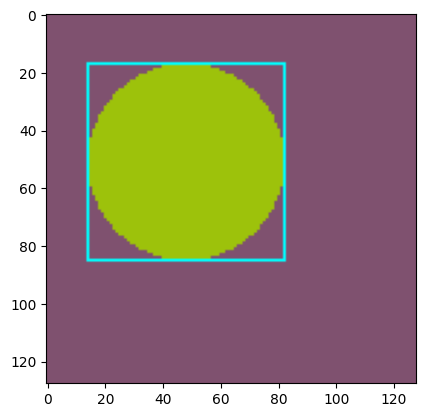

no ann
no ann
There is 0.00 % chance that a circle lying in the picture with [[0 0 0 0]] coordinates


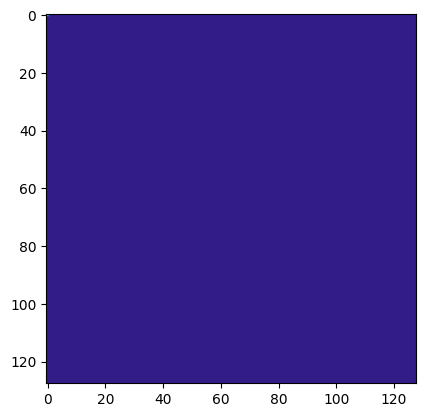

There is 100.00 % chance that a circle lying in the picture with [[15 19 79 83]] coordinates


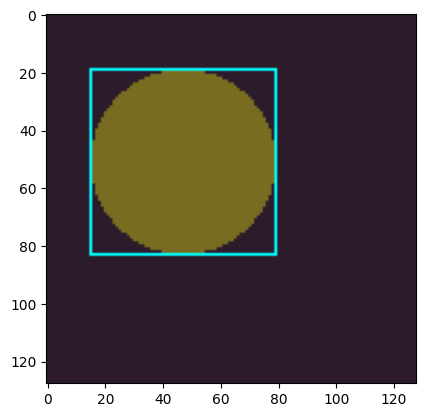

There is 100.00 % chance that a circle lying in the picture with [[ 8  6 86 83]] coordinates


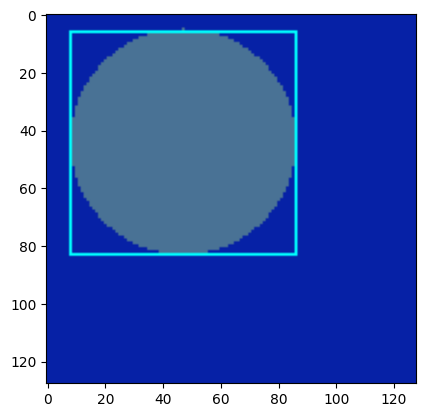

There is 100.00 % chance that a circle lying in the picture with [[ 2  1 85 85]] coordinates


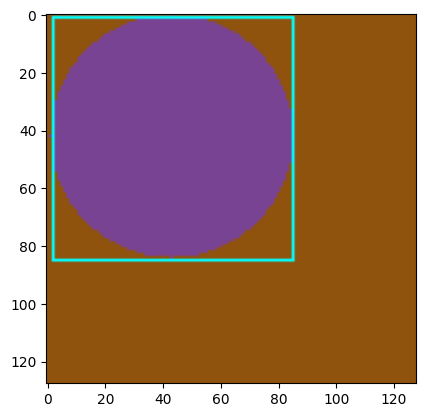

In [59]:
from metrics import get_iou
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_datasets import CustomImageDataset
import matplotlib.pyplot as plt

# IMGSZ = 128*2, 128*2

bbox_format = 'albumentations'
test_transform =  A.Compose([
    # A.augmentations.geometric.resize.Resize(*IMGSZ, interpolation=1, always_apply=False, p=1),
    A.Normalize(always_apply=True),
    ToTensorV2()],
    bbox_params=A.BboxParams(format=bbox_format, label_fields=['category_ids'])
)

val_dataset = CustomImageDataset(
    img_dir=r"/content/dataset/val/img",
    label_dir=r"/content/dataset/val/labels", transform=test_transform)


validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)

idx = 18



model = torch.load("/content/CircleDetection/trained_models/test_colored_img_prob.pt", map_location="cpu")
model.eval()
model.to('cpu')

avg_iou = 0

for idx in range(20, 50):

  with torch.no_grad():

      # print(train_dataset[0][0])
      sample = val_dataset[idx]
      image = sample[0].type(torch.FloatTensor)

      image = torch.unsqueeze(image, 0)

      output = model(image)


      image = cv2.imread(os.path.join(r"/content/dataset/val/img", val_dataset[idx][-1]))

      coords = np.array(output[0][0])
      coords = np.expand_dims(coords, axis=0)
      coords = remap_coords(bboxes=coords, img_size=image.shape[:2])
      print("There is {probability:.2f} % chance that a circle lying in the picture with {coords} coordinates".format(
          probability=output[2].item()*100,
          coords=coords))
      for coord in coords:
        cv2.rectangle(image, (coord[0], coord[1]), (coord[2], coord[3]), (0, 255, 255), 1)
      plt.imshow(image)
      plt.show()

In [53]:
output[2].item()

0.9999998807907104

In [5]:
%load_ext autoreload
%autoreload 2

In [ ]:
import importlib
from torch_datasets import CustomImageDataset

In [ ]:
%reload_ext autoreload

In [ ]:
import math
import os
import time

import albumentations as A
import matplotlib.pyplot as plt
import torch
from albumentations.pytorch import ToTensorV2
from torch import optim
from torch.nn import CrossEntropyLoss, BCELoss
from torch.utils.data import DataLoader
from torchvision.models import resnet50, resnet18
from tqdm import tqdm

from logger import WeightandBiaises
from losses import GIoULoss, DIoULoss
from metrics import batch_iou
from model.object_detector import ObjectDetector
from torch_datasets import CustomImageDataset
from utils import create_directory


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
PIN_MEMORY = True if DEVICE == "cuda" else False
# specify ImageNet mean and standard deviation
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
# initialize our initial learning rate, number of epochs to train
# for, and the batch size
INIT_LR = 1e-5
NUM_EPOCHS = 300
BATCH_SIZE = 8
# specify the loss weights
LABELS = 1.0
BBOX = 0.6
PROB = 0.4


wb_visu = True

def fix_bboxes(bboxes):
    for box in bboxes:
        if box[0] > box[2]:
            box[2] = box[0]
        if box[1] > box[3]:
            box[3] = box[1]
    return bboxes


model_name = "test_wb_proba2"

CLASSES = ["Circle"]

bbox_format = 'albumentations'
train_transform = A.Compose(
    [
        #A.augmentations.geometric.transforms.Affine (scale=(0.5, 1), translate_percent=(0.15, 0.5), keep_ratio=True, p=0.5),
        A.Equalize(mode='cv', by_channels=True, mask=None, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        # A.Rotate(limit=90, p=0.5, border_mode=0, rotate_method="ellipse"),
        A.CLAHE(p=0.5),
        A.OneOf([
            A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
            A.GridDistortion(p=0.5),
        ], p=0.0),
        A.Normalize(always_apply=True),
        A.augmentations.geometric.resize.Resize(683, 1024, interpolation=1, always_apply=False, p=1),
        ToTensorV2()],
    bbox_params=A.BboxParams(format=bbox_format, label_fields=['category_ids']),
)

test_transform = A.Compose([
    #A.augmentations.geometric.resize.Resize(683, 1024, interpolation=1, always_apply=False, p=1),
    A.Normalize(always_apply=True),
    ToTensorV2()],
    bbox_params=A.BboxParams(format=bbox_format, label_fields=['category_ids'])
)

train_dataset = CustomImageDataset(
    img_dir=r"/content/dataset/train/img",
    label_dir=r"/content/dataset/train/labels",
    transform=train_transform)

val_dataset = CustomImageDataset(
    img_dir=r"/content/dataset/val/img",
    label_dir=r"/content/dataset/val/labels",
    transform=test_transform)

training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

if __name__ == "__main__":

    print("[INFO] total training samples: {}...".format(len(train_dataset)))
    print("[INFO] total test samples: {}...".format(len(val_dataset)))
    # calculate steps per epoch for training and validation set
    trainSteps = math.ceil(len(train_dataset) / BATCH_SIZE)
    valSteps = math.ceil(len(val_dataset) / BATCH_SIZE)
    # create data loaders
    trainLoader = DataLoader(train_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, num_workers=os.cpu_count(), pin_memory=PIN_MEMORY)
    testLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(), pin_memory=PIN_MEMORY)

    # Network
    # load the ResNet50 network
    backbone = resnet18(pretrained=False)
    # freeze all ResNet50 layers so they will *not* be updated during the
    # training process
    params = backbone.state_dict()
    list_layers = list(params.keys())
    for name, param in backbone.named_parameters():
        if name in list_layers[0:]:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # create our custom object detector model and flash it to the current
    # device
    objectDetector = ObjectDetector(backbone, len(CLASSES))
    objectDetector = objectDetector.to(DEVICE)
    # define our loss functions

    classLossFunc = CrossEntropyLoss()
    probLossFunc = BCELoss()

    bboxLossFunc = DIoULoss()
    # initialize the optimizer, compile the model, and show the model
    # summary
    opt = optim.Adam(objectDetector.parameters(), lr=INIT_LR)

    # initialize a dictionary to store training history
    H = {"total_train_loss": [], "total_val_loss": [], "train_class_acc": [],
         "val_class_acc": [], "train_iou": [], "val_iou": []}

    if wb_visu:
        w_b = WeightandBiaises(project_name="circle_detection", run_id=model_name, interval_display=50)
    else:
        w_b = None

    # loop over epochs
    print("[INFO] training the network...")
    startTime = time.time()
    for e in tqdm(range(NUM_EPOCHS)):
        # set the model in training mode
        objectDetector.train()
        # initialize the total training and validation loss
        totalTrainLoss = 0
        totalValLoss = 0
        # initialize the number of correct predictions in the training
        # and validation step
        trainCorrect = 0
        valCorrect = 0

        train_iou = 0
        val_iou = 0

        # loop over the training set
        for (images, labels, bboxes, probs, filenames) in trainLoader:
            # send the input to the device
            labels = torch.Tensor(labels)
            # bboxes = torch.stack(bboxes, dim=1)

            bboxes = bboxes.to(torch.float32)
            bboxes = torch.squeeze(bboxes, 1)

            (images, labels, bboxes, probs) = (images.to(DEVICE),
                                        labels.to(DEVICE), bboxes.to(DEVICE), probs.to(DEVICE))
            # perform a forward pass and calculate the training loss
            opt.zero_grad()
            predictions = objectDetector(images)
            bboxLoss = bboxLossFunc(predictions[0], bboxes)
            prob_loss = probLossFunc(predictions[2], probs.float())
            totalLoss = BBOX * bboxLoss + prob_loss * LABELS

            totalLoss = totalLoss.to(torch.float)

            # zero out the gradients, perform the backpropagation step,
            # and update the weights

            totalLoss.backward()
            opt.step()
            # add the loss to the total training loss so far and
            # calculate the number of correct predictions
            train_iou += batch_iou(a=predictions[0].detach().cpu().numpy(), b=bboxes.cpu().numpy()).sum() / len(bboxes)
            totalTrainLoss += totalLoss
            trainCorrect += (predictions[1].argmax(1) == labels).type(torch.float).sum().item()

        # switch off autograd
        with torch.no_grad():
            # set the model in evaluation mode
            objectDetector.eval()
            # loop over the validation set
            for (images, labels, bboxes, probs, _) in testLoader:
                # send the input to the device
                labels = torch.Tensor(labels)
                bboxes = torch.squeeze(bboxes, 1)

                # bboxes = torch.stack(bboxes, dim=1)
                (images, labels, bboxes, probs) = (images.to(DEVICE),
                                            labels.to(DEVICE), bboxes.to(DEVICE), probs.to(DEVICE))
                # make the predictions and calculate the validation loss
                predictions = objectDetector(images)

                bboxLoss = bboxLossFunc(predictions[0], bboxes.to(torch.float32))
                prob_loss = probLossFunc(predictions[2], probs.float())
                totalLoss = BBOX * bboxLoss
                totalValLoss += totalLoss
                # calculate the number of correct predictions
                val_iou += batch_iou(a=predictions[0].detach().cpu().numpy(), b=bboxes.cpu().numpy()).sum() / len(
                    bboxes)
                valCorrect += (predictions[1].argmax(1) == labels).type(torch.float).sum().item()

                if w_b is not None:
                    w_b.plot_one_batch(predictions[0], images, [None]*len(predictions[0]), e)

        # calculate the average training and validation loss
        avgTrainLoss = totalTrainLoss / trainSteps
        avgValLoss = totalValLoss / valSteps
        # calculate the training and validation accuracy
        trainCorrect = trainCorrect / len(train_dataset)
        valCorrect = valCorrect / len(val_dataset)
        # update our training history
        H["total_train_loss"].append(avgTrainLoss.cpu().detach().numpy())
        H["train_class_acc"].append(trainCorrect)
        H["total_val_loss"].append(avgValLoss.cpu().detach().numpy())
        H["val_class_acc"].append(valCorrect)
        H["train_iou"].append(train_iou / trainSteps)
        H["val_iou"].append(val_iou / valSteps)
        # print the model training and validation information
        print("[INFO] EPOCH: {}/{}".format(e + 1, NUM_EPOCHS))
        print("Train loss: {:.6f}, Train accuracy: {:.8f}".format(
            avgTrainLoss, train_iou / trainSteps))
        print("Val loss: {:.6f}, Val accuracy: {:.8f}".format(
            avgValLoss, val_iou / valSteps))
        endTime = time.time()
        print("[INFO] total time taken to train the model: {:.2f}s".format(
            endTime - startTime))

        if w_b is not None:
            w_b.log_accuracy(train_accuracy=train_iou, test_accuracy=val_iou, epoch=e)
            w_b.log_losses(train_loss=avgTrainLoss.cpu().detach().numpy(), test_loss=avgValLoss.cpu().detach().numpy(), epoch=e)
            w_b.log_table(e)

    # serialize the model to disk
    print("[INFO] saving object detector model...")
    # torch.save(objectDetector, MODEL_PATH)
    # serialize the label encoder to disk
    print("[INFO] saving label encoder...")
    output_path = "trained_models"
    torch.save(objectDetector, os.path.join("/content/drive/MyDrive/Evry/model_detection_membrane", model_name + '.pt'))
    create_directory(output_path)
    torch.save(objectDetector, os.path.join(output_path, model_name + '.pt'))
    if w_b is not None:
        w_b.save_model(model_path=os.path.join(output_path, model_name + ".pth"))
    print("[INFO] Model was saved online")
    # f = open(LE_PATH, "wb")
    # f.write(pickle.dumps(le))
    # f.close()
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H["total_train_loss"], label="total_train_loss")
    plt.plot(H["total_val_loss"], label="total_val_loss")
    plt.plot(H["train_iou"], label="train_acc_iou")
    plt.plot(H["val_iou"], label="val_acc_iou")
    plt.title("Total Training Loss and Classification Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    # save the training plot
    plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


[INFO] total training samples: 4999...
[INFO] total test samples: 499...


[INFO] training the network...


  0%|          | 1/300 [03:17<16:24:47, 197.62s/it]

[INFO] EPOCH: 1/300
Train loss: 1.303622, Train accuracy: 0.00011711
Val loss: 0.781512, Val accuracy: 0.00017341
[INFO] total time taken to train the model: 197.62s


  1%|          | 2/300 [06:35<16:21:10, 197.55s/it]

[INFO] EPOCH: 2/300
Train loss: 1.037798, Train accuracy: 0.07719205
Val loss: 0.792217, Val accuracy: 0.03272428
[INFO] total time taken to train the model: 395.12s


  1%|          | 3/300 [09:52<16:17:59, 197.57s/it]

[INFO] EPOCH: 3/300
Train loss: 0.884617, Train accuracy: 0.11833947
Val loss: 0.778375, Val accuracy: 0.03958389
[INFO] total time taken to train the model: 592.73s


  1%|▏         | 4/300 [13:10<16:14:36, 197.56s/it]

[INFO] EPOCH: 4/300
Train loss: 0.820534, Train accuracy: 0.11647362
Val loss: 0.780348, Val accuracy: 0.04113686
[INFO] total time taken to train the model: 790.25s


  2%|▏         | 5/300 [16:27<16:11:20, 197.56s/it]

[INFO] EPOCH: 5/300
Train loss: 0.796158, Train accuracy: 0.11447337
Val loss: 0.772358, Val accuracy: 0.04526424
[INFO] total time taken to train the model: 987.82s


  2%|▏         | 6/300 [19:45<16:08:18, 197.62s/it]

[INFO] EPOCH: 6/300
Train loss: 0.762001, Train accuracy: 0.11538278
Val loss: 0.787412, Val accuracy: 0.03584207
[INFO] total time taken to train the model: 1185.54s


  2%|▏         | 7/300 [23:02<16:04:42, 197.55s/it]

[INFO] EPOCH: 7/300
Train loss: 0.761688, Train accuracy: 0.11826673
Val loss: 0.799987, Val accuracy: 0.02375693
[INFO] total time taken to train the model: 1382.97s


  3%|▎         | 8/300 [26:20<16:01:51, 197.64s/it]

[INFO] EPOCH: 8/300
Train loss: 0.730419, Train accuracy: 0.11731052
Val loss: 0.745888, Val accuracy: 0.06600502
[INFO] total time taken to train the model: 1580.81s


  3%|▎         | 9/300 [29:38<15:58:18, 197.59s/it]

[INFO] EPOCH: 9/300
Train loss: 0.717356, Train accuracy: 0.12043500
Val loss: 0.776437, Val accuracy: 0.04474654
[INFO] total time taken to train the model: 1778.27s


  3%|▎         | 10/300 [32:55<15:54:54, 197.57s/it]

[INFO] EPOCH: 10/300
Train loss: 0.720825, Train accuracy: 0.12108253
Val loss: 0.767810, Val accuracy: 0.05016519
[INFO] total time taken to train the model: 1975.80s


  4%|▎         | 11/300 [36:13<15:51:37, 197.57s/it]

[INFO] EPOCH: 11/300
Train loss: 0.715649, Train accuracy: 0.12140645
Val loss: 0.748367, Val accuracy: 0.06715749
[INFO] total time taken to train the model: 2173.37s


  4%|▍         | 12/300 [39:30<15:48:04, 197.52s/it]

[INFO] EPOCH: 12/300
Train loss: 0.691196, Train accuracy: 0.12034125
Val loss: 0.754943, Val accuracy: 0.05589204
[INFO] total time taken to train the model: 2370.77s


  4%|▍         | 13/300 [42:48<15:44:56, 197.55s/it]

[INFO] EPOCH: 13/300
Train loss: 0.696087, Train accuracy: 0.12086355
Val loss: 0.731092, Val accuracy: 0.07598009
[INFO] total time taken to train the model: 2568.38s


  5%|▍         | 14/300 [46:05<15:41:33, 197.53s/it]

[INFO] EPOCH: 14/300
Train loss: 0.680313, Train accuracy: 0.12166989
Val loss: 0.751694, Val accuracy: 0.06340447
[INFO] total time taken to train the model: 2765.88s


  5%|▌         | 15/300 [49:23<15:37:58, 197.47s/it]

[INFO] EPOCH: 15/300
Train loss: 0.682343, Train accuracy: 0.12085574
Val loss: 0.727933, Val accuracy: 0.07868211
[INFO] total time taken to train the model: 2963.20s


  5%|▌         | 16/300 [52:40<15:35:03, 197.55s/it]

[INFO] EPOCH: 16/300
Train loss: 0.678510, Train accuracy: 0.12194642
Val loss: 0.768850, Val accuracy: 0.04850794
[INFO] total time taken to train the model: 3160.93s


  6%|▌         | 17/300 [55:58<15:31:53, 197.57s/it]

[INFO] EPOCH: 17/300
Train loss: 0.675261, Train accuracy: 0.12140887
Val loss: 0.732105, Val accuracy: 0.08048059
[INFO] total time taken to train the model: 3358.57s


  6%|▌         | 18/300 [59:16<15:28:32, 197.56s/it]

[INFO] EPOCH: 18/300
Train loss: 0.678272, Train accuracy: 0.12213333
Val loss: 0.745539, Val accuracy: 0.06565947
[INFO] total time taken to train the model: 3556.10s


  6%|▋         | 19/300 [1:02:33<15:25:14, 197.56s/it]

[INFO] EPOCH: 19/300
Train loss: 0.667817, Train accuracy: 0.12127014
Val loss: 0.703226, Val accuracy: 0.09966801
[INFO] total time taken to train the model: 3753.66s


  7%|▋         | 20/300 [1:05:51<15:21:53, 197.55s/it]

[INFO] EPOCH: 20/300
Train loss: 0.679918, Train accuracy: 0.12218985
Val loss: 0.717042, Val accuracy: 0.09216902
[INFO] total time taken to train the model: 3951.17s


  7%|▋         | 21/300 [1:09:09<15:19:04, 197.65s/it]

[INFO] EPOCH: 21/300
Train loss: 0.674886, Train accuracy: 0.12251055
Val loss: 0.725929, Val accuracy: 0.08359123
[INFO] total time taken to train the model: 4149.06s


  7%|▋         | 22/300 [1:12:26<15:15:45, 197.65s/it]

[INFO] EPOCH: 22/300
Train loss: 0.671215, Train accuracy: 0.12255335
Val loss: 0.749688, Val accuracy: 0.06528968
[INFO] total time taken to train the model: 4346.70s


  8%|▊         | 23/300 [1:15:44<15:12:49, 197.72s/it]

[INFO] EPOCH: 23/300
Train loss: 0.663631, Train accuracy: 0.12155689
Val loss: 0.732600, Val accuracy: 0.07447681
[INFO] total time taken to train the model: 4544.60s


  8%|▊         | 24/300 [1:19:01<15:09:04, 197.62s/it]

[INFO] EPOCH: 24/300
Train loss: 0.662971, Train accuracy: 0.12127201
Val loss: 0.708740, Val accuracy: 0.09578454
[INFO] total time taken to train the model: 4742.00s


  8%|▊         | 25/300 [1:22:19<15:05:56, 197.66s/it]

[INFO] EPOCH: 25/300
Train loss: 0.661190, Train accuracy: 0.12122071
Val loss: 0.730737, Val accuracy: 0.07914125
[INFO] total time taken to train the model: 4939.74s


  9%|▊         | 26/300 [1:25:37<15:02:22, 197.60s/it]

[INFO] EPOCH: 26/300
Train loss: 0.659212, Train accuracy: 0.12140268
Val loss: 0.706158, Val accuracy: 0.09243460
[INFO] total time taken to train the model: 5137.21s


  9%|▉         | 27/300 [1:28:55<14:59:33, 197.71s/it]

[INFO] EPOCH: 27/300
Train loss: 0.657891, Train accuracy: 0.12173951
Val loss: 0.737702, Val accuracy: 0.07415602
[INFO] total time taken to train the model: 5335.15s


  9%|▉         | 28/300 [1:32:12<14:56:08, 197.68s/it]

[INFO] EPOCH: 28/300
Train loss: 0.660829, Train accuracy: 0.12259604
Val loss: 0.668921, Val accuracy: 0.12237007
[INFO] total time taken to train the model: 5532.77s


 10%|▉         | 29/300 [1:35:30<14:52:44, 197.66s/it]

[INFO] EPOCH: 29/300
Train loss: 0.647637, Train accuracy: 0.12136678
Val loss: 0.720397, Val accuracy: 0.08694124
[INFO] total time taken to train the model: 5730.37s


 10%|█         | 30/300 [1:38:47<14:48:59, 197.56s/it]

[INFO] EPOCH: 30/300
Train loss: 0.649921, Train accuracy: 0.12206929
Val loss: 0.700909, Val accuracy: 0.09966857
[INFO] total time taken to train the model: 5927.69s


 10%|█         | 31/300 [1:42:05<14:45:47, 197.57s/it]

[INFO] EPOCH: 31/300
Train loss: 0.650932, Train accuracy: 0.12188663
Val loss: 0.729373, Val accuracy: 0.08160064
[INFO] total time taken to train the model: 6125.31s


 11%|█         | 32/300 [1:45:23<14:42:51, 197.66s/it]

[INFO] EPOCH: 32/300
Train loss: 0.651899, Train accuracy: 0.12207192
Val loss: 0.690681, Val accuracy: 0.11021184
[INFO] total time taken to train the model: 6323.16s


 11%|█         | 33/300 [1:48:40<14:39:17, 197.59s/it]

[INFO] EPOCH: 33/300
Train loss: 0.651922, Train accuracy: 0.12181903
Val loss: 0.725282, Val accuracy: 0.08488224
[INFO] total time taken to train the model: 6520.61s


 11%|█▏        | 34/300 [1:51:57<14:35:40, 197.52s/it]

[INFO] EPOCH: 34/300
Train loss: 0.649537, Train accuracy: 0.12233181
Val loss: 0.706816, Val accuracy: 0.09264132
[INFO] total time taken to train the model: 6717.95s


 12%|█▏        | 35/300 [1:55:15<14:32:12, 197.48s/it]

[INFO] EPOCH: 35/300
Train loss: 0.650492, Train accuracy: 0.12111203
Val loss: 0.689087, Val accuracy: 0.11167409
[INFO] total time taken to train the model: 6915.35s


 12%|█▏        | 36/300 [1:58:32<14:28:52, 197.47s/it]

[INFO] EPOCH: 36/300
Train loss: 0.651002, Train accuracy: 0.12115104
Val loss: 0.720818, Val accuracy: 0.08851733
[INFO] total time taken to train the model: 7112.80s


 12%|█▏        | 37/300 [2:01:50<14:25:36, 197.48s/it]

[INFO] EPOCH: 37/300
Train loss: 0.648758, Train accuracy: 0.12277548
Val loss: 0.700232, Val accuracy: 0.10508279
[INFO] total time taken to train the model: 7310.29s


 13%|█▎        | 38/300 [2:05:07<14:22:18, 197.47s/it]

[INFO] EPOCH: 38/300
Train loss: 0.644928, Train accuracy: 0.12295339
Val loss: 0.687517, Val accuracy: 0.11519485
[INFO] total time taken to train the model: 7507.76s


 13%|█▎        | 39/300 [2:08:25<14:19:16, 197.53s/it]

[INFO] EPOCH: 39/300
Train loss: 0.644015, Train accuracy: 0.12114244
Val loss: 0.676059, Val accuracy: 0.12551315
[INFO] total time taken to train the model: 7705.43s


 13%|█▎        | 40/300 [2:11:42<14:15:43, 197.48s/it]

[INFO] EPOCH: 40/300
Train loss: 0.646458, Train accuracy: 0.12283436
Val loss: 0.685416, Val accuracy: 0.11543084
[INFO] total time taken to train the model: 7902.77s


 14%|█▎        | 41/300 [2:15:00<14:12:37, 197.52s/it]

[INFO] EPOCH: 41/300
Train loss: 0.638154, Train accuracy: 0.12131170
Val loss: 0.687467, Val accuracy: 0.11508804
[INFO] total time taken to train the model: 8100.39s


 14%|█▍        | 42/300 [2:18:17<14:09:22, 197.53s/it]

[INFO] EPOCH: 42/300
Train loss: 0.644092, Train accuracy: 0.12216950
Val loss: 0.708322, Val accuracy: 0.10000095
[INFO] total time taken to train the model: 8297.95s


 14%|█▍        | 43/300 [2:21:35<14:06:09, 197.55s/it]

[INFO] EPOCH: 43/300
Train loss: 0.652102, Train accuracy: 0.12326401
Val loss: 0.701670, Val accuracy: 0.10571464
[INFO] total time taken to train the model: 8495.54s


 15%|█▍        | 44/300 [2:24:52<14:02:31, 197.47s/it]

[INFO] EPOCH: 44/300
Train loss: 0.646605, Train accuracy: 0.12322077
Val loss: 0.704455, Val accuracy: 0.10158285
[INFO] total time taken to train the model: 8692.82s


 15%|█▌        | 45/300 [2:28:10<13:59:08, 197.45s/it]

[INFO] EPOCH: 45/300
Train loss: 0.642553, Train accuracy: 0.12222416
Val loss: 0.703665, Val accuracy: 0.11349053
[INFO] total time taken to train the model: 8890.21s


 15%|█▌        | 46/300 [2:31:27<13:55:48, 197.44s/it]

[INFO] EPOCH: 46/300
Train loss: 0.640712, Train accuracy: 0.12171129
Val loss: 0.686242, Val accuracy: 0.11345427
[INFO] total time taken to train the model: 9087.62s


 16%|█▌        | 47/300 [2:34:45<13:52:39, 197.47s/it]

[INFO] EPOCH: 47/300
Train loss: 0.638585, Train accuracy: 0.12179726
Val loss: 0.734553, Val accuracy: 0.07534915
[INFO] total time taken to train the model: 9285.17s


 16%|█▌        | 48/300 [2:38:02<13:49:27, 197.49s/it]

[INFO] EPOCH: 48/300
Train loss: 0.639395, Train accuracy: 0.12257735
Val loss: 0.692150, Val accuracy: 0.10444810
[INFO] total time taken to train the model: 9482.71s


 16%|█▋        | 49/300 [2:41:20<13:46:10, 197.49s/it]

[INFO] EPOCH: 49/300
Train loss: 0.631689, Train accuracy: 0.12273973
Val loss: 0.713506, Val accuracy: 0.09058655
[INFO] total time taken to train the model: 9680.20s


 17%|█▋        | 50/300 [2:44:37<13:42:38, 197.43s/it]

[INFO] EPOCH: 50/300
Train loss: 0.651380, Train accuracy: 0.12365163
Val loss: 0.763050, Val accuracy: 0.05277690
[INFO] total time taken to train the model: 9877.50s


[INFO] EPOCH: 51/300
Train loss: 0.636471, Train accuracy: 0.12230330
Val loss: 0.717960, Val accuracy: 0.08458696
[INFO] total time taken to train the model: 10075.91s


 17%|█▋        | 52/300 [2:51:14<13:37:41, 197.83s/it]

[INFO] EPOCH: 52/300
Train loss: 0.643936, Train accuracy: 0.12201681
Val loss: 0.713146, Val accuracy: 0.08814525
[INFO] total time taken to train the model: 10274.17s


 18%|█▊        | 53/300 [2:54:32<13:34:25, 197.84s/it]

[INFO] EPOCH: 53/300
Train loss: 0.644761, Train accuracy: 0.12251948
Val loss: 0.703833, Val accuracy: 0.09809162
[INFO] total time taken to train the model: 10472.03s


 18%|█▊        | 54/300 [2:57:49<13:30:39, 197.72s/it]

[INFO] EPOCH: 54/300
Train loss: 0.634450, Train accuracy: 0.12330674
Val loss: 0.698802, Val accuracy: 0.10234003
[INFO] total time taken to train the model: 10669.48s


 18%|█▊        | 55/300 [3:01:05<13:25:37, 197.30s/it]

[INFO] EPOCH: 55/300
Train loss: 0.637615, Train accuracy: 0.12221242
Val loss: 0.693956, Val accuracy: 0.10831436
[INFO] total time taken to train the model: 10865.79s


 19%|█▊        | 56/300 [3:04:21<13:20:26, 196.83s/it]

[INFO] EPOCH: 56/300
Train loss: 0.638412, Train accuracy: 0.12309165
Val loss: 0.700939, Val accuracy: 0.10147863
[INFO] total time taken to train the model: 11061.53s


 19%|█▉        | 57/300 [3:07:39<13:18:04, 197.05s/it]

[INFO] EPOCH: 57/300
Train loss: 0.645757, Train accuracy: 0.12310302
Val loss: 0.714795, Val accuracy: 0.09227632
[INFO] total time taken to train the model: 11259.11s


 19%|█▉        | 58/300 [3:10:56<13:15:19, 197.19s/it]

[INFO] EPOCH: 58/300
Train loss: 0.634116, Train accuracy: 0.12278787
Val loss: 0.685189, Val accuracy: 0.11464660
[INFO] total time taken to train the model: 11456.61s


 20%|█▉        | 59/300 [3:14:14<13:12:35, 197.33s/it]

[INFO] EPOCH: 59/300
Train loss: 0.640091, Train accuracy: 0.12431011
Val loss: 0.704711, Val accuracy: 0.09673525
[INFO] total time taken to train the model: 11654.26s


 20%|██        | 60/300 [3:17:31<13:09:20, 197.34s/it]

[INFO] EPOCH: 60/300
Train loss: 0.631518, Train accuracy: 0.12243700
Val loss: 0.708851, Val accuracy: 0.09342023
[INFO] total time taken to train the model: 11851.62s


 20%|██        | 61/300 [3:20:49<13:06:14, 197.38s/it]

[INFO] EPOCH: 61/300
Train loss: 0.630677, Train accuracy: 0.12269812
Val loss: 0.683185, Val accuracy: 0.11313977
[INFO] total time taken to train the model: 12049.11s


 21%|██        | 62/300 [3:24:06<13:03:19, 197.48s/it]

[INFO] EPOCH: 62/300
Train loss: 0.634894, Train accuracy: 0.12297197
Val loss: 0.701467, Val accuracy: 0.10166714
[INFO] total time taken to train the model: 12246.81s


 21%|██        | 63/300 [3:27:24<13:00:31, 197.60s/it]

[INFO] EPOCH: 63/300
Train loss: 0.631347, Train accuracy: 0.12202638
Val loss: 0.666249, Val accuracy: 0.13102999
[INFO] total time taken to train the model: 12444.69s


 21%|██▏       | 64/300 [3:30:42<12:56:59, 197.54s/it]

[INFO] EPOCH: 64/300
Train loss: 0.635904, Train accuracy: 0.12303248
Val loss: 0.752872, Val accuracy: 0.06008081
[INFO] total time taken to train the model: 12642.10s


 22%|██▏       | 65/300 [3:33:59<12:53:52, 197.59s/it]

[INFO] EPOCH: 65/300
Train loss: 0.637566, Train accuracy: 0.12259919
Val loss: 0.732953, Val accuracy: 0.07892594
[INFO] total time taken to train the model: 12839.79s


 22%|██▏       | 66/300 [3:37:17<12:50:24, 197.54s/it]

[INFO] EPOCH: 66/300
Train loss: 0.638638, Train accuracy: 0.12336661
Val loss: 0.707621, Val accuracy: 0.09916265
[INFO] total time taken to train the model: 13037.22s


 22%|██▏       | 67/300 [3:40:34<12:47:12, 197.56s/it]

[INFO] EPOCH: 67/300
Train loss: 0.631096, Train accuracy: 0.12234479
Val loss: 0.714158, Val accuracy: 0.08612660
[INFO] total time taken to train the model: 13234.84s


 23%|██▎       | 68/300 [3:43:52<12:43:56, 197.57s/it]

[INFO] EPOCH: 68/300
Train loss: 0.631755, Train accuracy: 0.12326750
Val loss: 0.705380, Val accuracy: 0.09466733
[INFO] total time taken to train the model: 13432.42s


 23%|██▎       | 69/300 [3:47:09<12:40:32, 197.54s/it]

[INFO] EPOCH: 69/300
Train loss: 0.632981, Train accuracy: 0.12271683
Val loss: 0.681026, Val accuracy: 0.11877925
[INFO] total time taken to train the model: 13629.91s


 23%|██▎       | 70/300 [3:50:27<12:37:11, 197.53s/it]

[INFO] EPOCH: 70/300
Train loss: 0.638402, Train accuracy: 0.12356056
Val loss: 0.709130, Val accuracy: 0.09682508
[INFO] total time taken to train the model: 13827.40s


 24%|██▎       | 71/300 [3:53:44<12:33:54, 197.53s/it]

[INFO] EPOCH: 71/300
Train loss: 0.631047, Train accuracy: 0.12289819
Val loss: 0.697745, Val accuracy: 0.09734051
[INFO] total time taken to train the model: 14024.93s


 24%|██▍       | 72/300 [3:57:02<12:30:07, 197.40s/it]

[INFO] EPOCH: 72/300
Train loss: 0.631418, Train accuracy: 0.12385396
Val loss: 0.681843, Val accuracy: 0.11899773
[INFO] total time taken to train the model: 14222.04s


 24%|██▍       | 73/300 [4:00:19<12:26:58, 197.44s/it]

[INFO] EPOCH: 73/300
Train loss: 0.634176, Train accuracy: 0.12257506
Val loss: 0.677981, Val accuracy: 0.11731270
[INFO] total time taken to train the model: 14419.55s


 25%|██▍       | 74/300 [4:03:37<12:24:01, 197.53s/it]

[INFO] EPOCH: 74/300
Train loss: 0.630707, Train accuracy: 0.12443349
Val loss: 0.711914, Val accuracy: 0.08885239
[INFO] total time taken to train the model: 14617.29s


 25%|██▌       | 75/300 [4:06:54<12:20:53, 197.57s/it]

[INFO] EPOCH: 75/300
Train loss: 0.638642, Train accuracy: 0.12310512
Val loss: 0.694649, Val accuracy: 0.10384862
[INFO] total time taken to train the model: 14814.97s


 25%|██▌       | 76/300 [4:10:12<12:17:29, 197.54s/it]

[INFO] EPOCH: 76/300
Train loss: 0.629849, Train accuracy: 0.12369908
Val loss: 0.682136, Val accuracy: 0.11294871
[INFO] total time taken to train the model: 15012.45s


 26%|██▌       | 77/300 [4:13:29<12:14:06, 197.52s/it]

[INFO] EPOCH: 77/300
Train loss: 0.631151, Train accuracy: 0.12259798
Val loss: 0.704502, Val accuracy: 0.09979509
[INFO] total time taken to train the model: 15209.91s


 26%|██▌       | 78/300 [4:16:47<12:10:54, 197.54s/it]

[INFO] EPOCH: 78/300
Train loss: 0.626545, Train accuracy: 0.12328733
Val loss: 0.724839, Val accuracy: 0.08041302
[INFO] total time taken to train the model: 15407.51s


 26%|██▋       | 79/300 [4:20:04<12:07:31, 197.52s/it]

[INFO] EPOCH: 79/300
Train loss: 0.626009, Train accuracy: 0.12347076
Val loss: 0.679456, Val accuracy: 0.12101910
[INFO] total time taken to train the model: 15604.97s


 27%|██▋       | 80/300 [4:23:22<12:04:19, 197.54s/it]

[INFO] EPOCH: 80/300
Train loss: 0.633336, Train accuracy: 0.12458133
Val loss: 0.793963, Val accuracy: 0.02845089
[INFO] total time taken to train the model: 15802.58s


 27%|██▋       | 81/300 [4:26:40<12:00:58, 197.53s/it]

[INFO] EPOCH: 81/300
Train loss: 0.633673, Train accuracy: 0.12339376
Val loss: 0.683733, Val accuracy: 0.10756784
[INFO] total time taken to train the model: 16000.07s


 27%|██▋       | 82/300 [4:29:57<11:57:47, 197.56s/it]

[INFO] EPOCH: 82/300
Train loss: 0.630308, Train accuracy: 0.12401274
Val loss: 0.702589, Val accuracy: 0.10772170
[INFO] total time taken to train the model: 16197.69s


 28%|██▊       | 83/300 [4:33:15<11:54:18, 197.50s/it]

[INFO] EPOCH: 83/300
Train loss: 0.623785, Train accuracy: 0.12402430
Val loss: 0.685399, Val accuracy: 0.11577091
[INFO] total time taken to train the model: 16395.07s


 28%|██▊       | 84/300 [4:36:32<11:50:52, 197.46s/it]

[INFO] EPOCH: 84/300
Train loss: 0.625855, Train accuracy: 0.12436169
Val loss: 0.704199, Val accuracy: 0.09442454
[INFO] total time taken to train the model: 16592.44s


 28%|██▊       | 85/300 [4:39:50<11:47:48, 197.53s/it]

[INFO] EPOCH: 85/300
Train loss: 0.625154, Train accuracy: 0.12400072
Val loss: 0.702740, Val accuracy: 0.09326230
[INFO] total time taken to train the model: 16790.11s


 29%|██▊       | 86/300 [4:43:07<11:44:27, 197.51s/it]

[INFO] EPOCH: 86/300
Train loss: 0.620278, Train accuracy: 0.12526873
Val loss: 0.710791, Val accuracy: 0.08758454
[INFO] total time taken to train the model: 16987.59s


 29%|██▉       | 87/300 [4:46:25<11:41:21, 197.57s/it]

[INFO] EPOCH: 87/300
Train loss: 0.626174, Train accuracy: 0.12519175
Val loss: 0.714953, Val accuracy: 0.08853739
[INFO] total time taken to train the model: 17185.28s


 29%|██▉       | 88/300 [4:49:42<11:38:00, 197.55s/it]

[INFO] EPOCH: 88/300
Train loss: 0.626706, Train accuracy: 0.12570963
Val loss: 0.717883, Val accuracy: 0.08223453
[INFO] total time taken to train the model: 17382.79s


 30%|██▉       | 89/300 [4:53:00<11:34:51, 197.59s/it]

[INFO] EPOCH: 89/300
Train loss: 0.627016, Train accuracy: 0.12539057
Val loss: 0.759795, Val accuracy: 0.05198845
[INFO] total time taken to train the model: 17580.48s


 30%|███       | 90/300 [4:56:18<11:31:30, 197.57s/it]

[INFO] EPOCH: 90/300
Train loss: 0.625390, Train accuracy: 0.12483288
Val loss: 0.697362, Val accuracy: 0.09514332
[INFO] total time taken to train the model: 17778.01s


 30%|███       | 91/300 [4:59:35<11:28:14, 197.58s/it]

[INFO] EPOCH: 91/300
Train loss: 0.626885, Train accuracy: 0.12580850
Val loss: 0.728105, Val accuracy: 0.07539018
[INFO] total time taken to train the model: 17975.61s


 31%|███       | 92/300 [5:02:53<11:25:01, 197.60s/it]

[INFO] EPOCH: 92/300
Train loss: 0.629083, Train accuracy: 0.12512493
Val loss: 0.701301, Val accuracy: 0.09901352
[INFO] total time taken to train the model: 18173.26s


 31%|███       | 93/300 [5:06:10<11:21:35, 197.56s/it]

[INFO] EPOCH: 93/300
Train loss: 0.624439, Train accuracy: 0.12582418
Val loss: 0.725147, Val accuracy: 0.07048626
[INFO] total time taken to train the model: 18370.73s


 31%|███▏      | 94/300 [5:09:28<11:18:16, 197.56s/it]

[INFO] EPOCH: 94/300
Train loss: 0.622380, Train accuracy: 0.12559432
Val loss: 0.702603, Val accuracy: 0.09197884
[INFO] total time taken to train the model: 18568.28s


 32%|███▏      | 95/300 [5:12:45<11:15:01, 197.57s/it]

[INFO] EPOCH: 95/300
Train loss: 0.627664, Train accuracy: 0.12570042
Val loss: 0.734181, Val accuracy: 0.06881317
[INFO] total time taken to train the model: 18765.87s


 32%|███▏      | 96/300 [5:16:03<11:11:17, 197.44s/it]

[INFO] EPOCH: 96/300
Train loss: 0.624707, Train accuracy: 0.12541541
Val loss: 0.751431, Val accuracy: 0.05783796
[INFO] total time taken to train the model: 18963.00s


 32%|███▏      | 97/300 [5:19:20<11:08:05, 197.46s/it]

[INFO] EPOCH: 97/300
Train loss: 0.625760, Train accuracy: 0.12566504
Val loss: 0.779599, Val accuracy: 0.03631953
[INFO] total time taken to train the model: 19160.53s


 33%|███▎      | 98/300 [5:22:37<11:04:46, 197.46s/it]

[INFO] EPOCH: 98/300
Train loss: 0.622956, Train accuracy: 0.12547384
Val loss: 0.753571, Val accuracy: 0.05263155
[INFO] total time taken to train the model: 19357.97s


 33%|███▎      | 99/300 [5:25:55<11:01:29, 197.46s/it]

[INFO] EPOCH: 99/300
Train loss: 0.625208, Train accuracy: 0.12577218
Val loss: 0.745735, Val accuracy: 0.06296845
[INFO] total time taken to train the model: 19555.44s


 33%|███▎      | 100/300 [5:29:13<10:58:29, 197.55s/it]

[INFO] EPOCH: 100/300
Train loss: 0.624639, Train accuracy: 0.12565203
Val loss: 0.765936, Val accuracy: 0.04195942
[INFO] total time taken to train the model: 19753.19s


[INFO] EPOCH: 101/300
Train loss: 0.627715, Train accuracy: 0.12688728
Val loss: 0.756858, Val accuracy: 0.05049324
[INFO] total time taken to train the model: 19951.77s


 34%|███▍      | 102/300 [5:35:50<10:53:12, 197.94s/it]

[INFO] EPOCH: 102/300
Train loss: 0.628747, Train accuracy: 0.12705000
Val loss: 0.729235, Val accuracy: 0.06945172
[INFO] total time taken to train the model: 20150.10s


 34%|███▍      | 103/300 [5:39:07<10:49:38, 197.86s/it]

[INFO] EPOCH: 103/300
Train loss: 0.619696, Train accuracy: 0.12768294
Val loss: 0.706145, Val accuracy: 0.09108579
[INFO] total time taken to train the model: 20347.77s


 35%|███▍      | 104/300 [5:42:25<10:45:49, 197.70s/it]

[INFO] EPOCH: 104/300
Train loss: 0.624829, Train accuracy: 0.12734698
Val loss: 0.708937, Val accuracy: 0.08846977
[INFO] total time taken to train the model: 20545.10s


 35%|███▌      | 105/300 [5:45:42<10:42:29, 197.69s/it]

[INFO] EPOCH: 105/300
Train loss: 0.621478, Train accuracy: 0.12808883
Val loss: 0.689326, Val accuracy: 0.10636362
[INFO] total time taken to train the model: 20742.76s


 35%|███▌      | 106/300 [5:49:00<10:39:05, 197.66s/it]

[INFO] EPOCH: 106/300
Train loss: 0.617411, Train accuracy: 0.12930184
Val loss: 0.709203, Val accuracy: 0.09297348
[INFO] total time taken to train the model: 20940.35s


 36%|███▌      | 107/300 [5:52:17<10:35:37, 197.61s/it]

[INFO] EPOCH: 107/300
Train loss: 0.626225, Train accuracy: 0.12821147
Val loss: 0.766824, Val accuracy: 0.04976026
[INFO] total time taken to train the model: 21137.83s


 36%|███▌      | 108/300 [5:55:35<10:32:24, 197.63s/it]

[INFO] EPOCH: 108/300
Train loss: 0.625378, Train accuracy: 0.12866905
Val loss: 0.741790, Val accuracy: 0.06686963
[INFO] total time taken to train the model: 21335.51s


 36%|███▋      | 109/300 [5:58:52<10:28:55, 197.57s/it]

[INFO] EPOCH: 109/300
Train loss: 0.622942, Train accuracy: 0.12959555
Val loss: 0.741753, Val accuracy: 0.06595573
[INFO] total time taken to train the model: 21532.93s


In [ ]:
predictions[0].detach().cpu().numpy()

array([[0.499613  , 0.5342535 , 0.49815556, 0.46239403],
       [0.49921042, 0.5332299 , 0.4974247 , 0.46205884],
       [0.49971265, 0.5347713 , 0.49819928, 0.46289167],
       [0.500562  , 0.5350287 , 0.4979017 , 0.4635175 ],
       [0.49966407, 0.5347409 , 0.49802977, 0.4638134 ],
       [0.49946877, 0.53417414, 0.4980976 , 0.4627552 ],
       [0.50093335, 0.5353431 , 0.49811497, 0.46422887],
       [0.5019656 , 0.53539795, 0.49767727, 0.46393022],
       [0.49962917, 0.5344855 , 0.49814186, 0.4627451 ],
       [0.4998826 , 0.534221  , 0.49777544, 0.46322858],
       [0.500346  , 0.5346179 , 0.49830714, 0.46264976],
       [0.5004357 , 0.5350996 , 0.49795952, 0.46434438],
       [0.5006531 , 0.5352811 , 0.49781176, 0.46412745],
       [0.50026107, 0.53483325, 0.49813148, 0.462972  ],
       [0.49956504, 0.53434056, 0.49800357, 0.4625159 ]], dtype=float32)

In [ ]:
bboxes.cpu().numpy()

array([[0.35416667, 0.20506536, 0.64875731, 0.64133987],
       [0.35709064, 0.22086057, 0.6494883 , 0.65631808],
       [0.32346491, 0.23257081, 0.61421784, 0.67538126],
       [0.31487573, 0.35321351, 0.60836988, 0.791939  ],
       [0.32226562, 0.25768668, 0.61914062, 0.69253294],
       [0.36641082, 0.25      , 0.65679825, 0.69308279],
       [0.38476562, 0.19326501, 0.67578125, 0.62518302],
       [0.35839844, 0.20204978, 0.64550781, 0.63543192],
       [0.4250731 , 0.36764706, 0.71820175, 0.80092593],
       [0.38121345, 0.18300654, 0.67306287, 0.62118736],
       [0.28782895, 0.30010893, 0.57913012, 0.73720044],
       [0.36132812, 0.26939971, 0.64941406, 0.69985359],
       [0.35546875, 0.21083455, 0.64257812, 0.63689605],
       [0.33534357, 0.2421024 , 0.62792398, 0.67810458],
       [0.32913012, 0.23366013, 0.62061404, 0.67184096]])

In [ ]:
!mkdir "trained_models"

In [ ]:
os.mkdir("trained_models")

FileExistsError: ignored

In [ ]:
torch.save(objectDetector, os.path.join("trained_models", model_name + '.pt'))

In [5]:
from metrics import get_iou

val_dataset = CustomImageDataset(
    img_dir=r"/content/dataset/val/img",
    label_dir=r"/content/dataset/val/labels", transform=test_transform)


validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)

idx = 1

start = time.time()

model = torch.load(r"/content/CircleDetection/trained_models/legio2.pt")
model.eval()
model.to('cpu')

avg_iou = 0

with torch.no_grad():

    # print(train_dataset[0][0])
    sample = val_dataset[idx]
    image = sample[0].type(torch.FloatTensor)

    image = torch.unsqueeze(image, 0)

    output = model(image)[0]
    
    # iou = get_iou(output[0][0], sample[2][0])
    # print(sample[-1], iou)
    # avg_iou += iou



    image = cv2.imread(os.path.join(r"/content/dataset/val/img", val_dataset[idx][-1]))

    coords = np.array(output[0])
    coords = np.expand_dims(coords, axis=0)
    coords = remap_coords(bboxes=coords, img_size=image.shape[:2])
    print(coords)
    for coord in coords:
      cv2.rectangle(image, (coord[0], coord[1]), (coord[2], coord[3]), (0, 255, 255), 1)
    plt.imshow(image)
    plt.show()


NameError: ignored

In [57]:
def remap_coords(bboxes: np.array, img_size: typing.Tuple[int, int]):
  bboxes[:, 0] = bboxes[:, 0] * img_size[1]
  bboxes[:, 1] = bboxes[:, 1] * img_size[0]
  bboxes[:, 2] = bboxes[:, 2] * img_size[1]
  bboxes[:, 3] = bboxes[:, 3] * img_size[0]
  return np.round(bboxes).astype(int)

In [ ]:
sample = val_dataset[100]
image = sample[0].type(torch.FloatTensor)

image = torch.unsqueeze(image, 0)

output = model(image)
output

(tensor([[0.5131, 0.5528, 0.6523, 0.6873]], grad_fn=<SigmoidBackward0>),
 tensor([[0.0693]], grad_fn=<AddmmBackward0>))